# 🩺 Heart Attack Prediction using Machine Learning (SVM)
Predicting risk of heart attack based on medical dataset using Support Vector Machine.


Tujuan dari project ini adalah:
- Melakukan analisis data kesehatan pasien
- Membangun model machine learning untuk memprediksi risiko serangan jantung
- Mengukur performa model menggunakan accuracy, precision, recall, dan confusion matrix


## Dataset Description
Source : Kaggle – Heart Attack Prediction Dataset  
Jumlah dataset : 303 data

age: age in years
sex: sex
    1 = male
    0 = female
cp: chest pain type
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl)
    1 = true;
    0 = false
restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina
    1 = yes
    0 = no
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
    Value 0: upsloping
    Value 1: flat
    Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal:
    0 = error (in the original dataset 0 maps to NaN's)
    1 = fixed defect
    2 = normal
    3 = reversable defect
target (the lable):
    0 = no disease,
    1 = disease



<h3>1.Import Libraries</h3>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


<h3>2.Load Data</h3>

In [ ]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>3. EDA (Explotary Data Analysis)</h3>

Tujuan tahapan ini:
- Melihat missing values
- Distribusi data
- Korelasi antar fitur


In [ ]:
df.info()
df.describe()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>4.Visualization</h3>

target
1    165
0    138
Name: count, dtype: int64

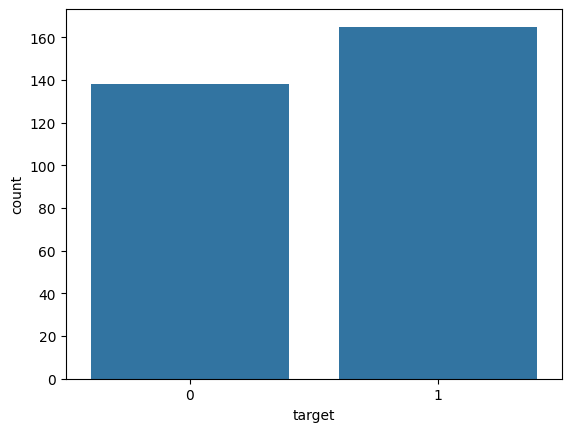

In [ ]:
import seaborn as sns
sns.countplot(x="target", data=df)
df['target'].value_counts()


Dengan Distribusi target 1 = 165 dan 0 = 138, target bisa dikatakan seimbang dengan perbandingan 55:45 sehingga tidak diperlukan SMOTE atau class_weight

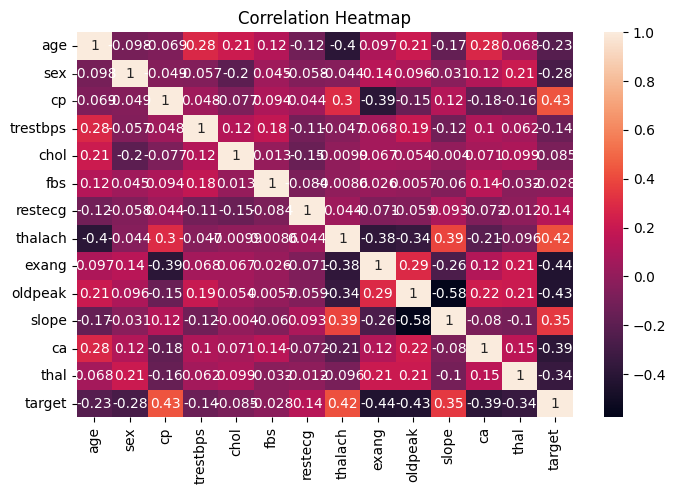

In [ ]:

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


Fitur thalach memiliki korelasi positif tertinggi dengan target, artinya semakin tinggi nilai maximum heart rate achieved, semakin tinggi kemungkinan serangan jantung."

<h3>5. Preprocessing</h3>
- Pisahkan fitur dan target
- Train-test split
- Standard scaling


In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<h3>6.Hyperparameter Tuning (GridSearchCV)</h3>
Pada tahap ini dilakukan proses hyperparameter tuning untuk mencari kombinasi parameter terbaik pada model SVM. Proses ini bertujuan meningkatkan performa model melalui pengaturan parameter seperti:

kernel : fungsi kernel yang digunakan SVM (linear / rbf)

C : complexity penalty (mengontrol margin)

gamma : pengaruh satu data point pada model (khusus untuk kernel RBF)

Algoritma yang digunakan adalah GridSearchCV dengan cross-validation (cv=5) sehingga setiap kombinasi parameter diuji dan dievaluasi untuk menemukan model dengan performa terbaik.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



svm = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)

model = grid.best_estimator_


print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8224489795918368


<h3>7. Train ulang dengan parameter terbaik</h3>

In [ ]:

y_pred = model.predict(X_test)



## CONFUSION MATRIX
*Model berhasil mendeteksi 27 pasien yang benar-benar memiliki risiko serangan jantung (True Positive).
*Model juga mengklasifikasikan 26 pasien dengan benar sebagai tidak berisiko (True Negative).
*Terdapat 3 kasus False Positive, yaitu pasien yang diprediksi berisiko padahal tidak.
*Terdapat 5 kasus False Negative, yaitu pasien yang sebenarnya berisiko tetapi tidak terdeteksi oleh model.

False Negative memiliki dampak yang paling serius dalam kasus ini karena dapat menyebabkan pasien yang seharusnya ditindaklanjuti malah dianggap aman.

<h3>8.Visualisasi hasil tuning</h3>

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results[['param_kernel','param_C','param_gamma','mean_test_score']]


,param_kernel,param_C,param_gamma,mean_test_score
0,rbf,0.1,scale,0.801701
1,linear,0.1,scale,0.805782
2,rbf,0.1,auto,0.801701
3,linear,0.1,auto,0.805782
4,rbf,1.0,scale,0.822449
5,linear,1.0,scale,0.813946
6,rbf,1.0,auto,0.822449
7,linear,1.0,auto,0.813946
8,rbf,10.0,scale,0.764711
9,linear,10.0,scale,0.809779


Setelah hyperparameter tuning, GridSearchCV memilih parameter terbaik yaitu kernel='rbf', C=1, dan gamma='scale'. Performa rata-rata selama training adalah 82.24%, dan setelah model dilatih ulang menggunakan parameter terbaik, akurasi pada data testing meningkat menjadi 86.88%.

<h3>9. ROC Curve & AUC Score</h3>

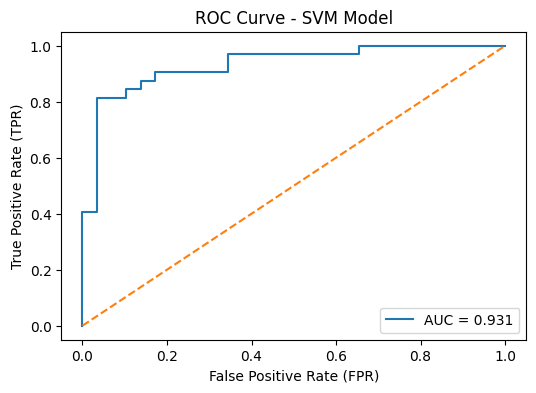

AUC Score: 0.9310344827586207


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilitas (bukan label) untuk kelas positif (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # garis random guessing
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - SVM Model")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


*ROC Curve yang semakin dekat ke sudut kiri atas berarti model semakin bagus.

*AUC menunjukkan kualitas model secara keseluruhan dalam melakukan prediksi pada berbagai threshold

In [ ]:
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Confusion Matrix:
 [[26  3]
 [ 5 27]]


<h3>10.Conclusion</h3>

Berdasarkan analisis dataset dan hasil pemodelan menggunakan Support Vector Machine (SVM), didapatkan beberapa poin penting:

Dari Exploratory Data Analysis (EDA), fitur yang paling mempengaruhi risiko serangan jantung adalah:
-cp (chest pain type)
-thalach (maximum heart rate achieved)
-oldpeak
-exang
-slope

Model terbaik diperoleh menggunakan SVM dengan kernel RBF dan parameter hasil tuning:
C = 1
gamma = "scale"
kernel = "rbf"

Evaluasi model menunjukkan hasil:
Test Accuracy: 0.86
ROC AUC Score: 0.93

Recall pada kelas positif harus dijaga tinggi karena kasus False Negative lebih berbahaya dalam konteks kesehatan.

Confusion Matrix menunjukkan keseimbangan antara True Positive dan True Negative.

Model mampu mendeteksi pasien yang berisiko dengan baik, ditunjukkan oleh nilai Recall yang tinggi pada kelas positif (pasien risiko).

Secara keseluruhan, model SVM ini cukup efektif dalam memprediksi kemungkinan serangan jantung, dan dapat dijadikan baseline model untuk pengembangan selanjutnya.